### US Trade Analysis
##### Years Covered - 1998 - 2018

In [62]:
### Code Header
## Notebook Name: US Import/Exports Analysis 1998 - 2018
## Version : 1
## Creation Date : 09/27/2019
## Description : An explorative analysis to learn how the US Imports/Exports have varied in the last 20 years
## Data Sources: 
    # 1 : US Trade Data - from USA Trade online hosted by the US Department of Commerce - https://usatrade.census.gov
    # 2 : USD CPI Data - from the Bureau of Labor Statistics website hosted by the United States Department of Labor
## Author(s): Vallabh Reddy
## Edits :
## Changes to be made :
## Future Analyses to include : 
    # 1. District level analysis to learn the exports and imports of the different regions of the US
## Author Comments :
    # 1. This analysis started out as a course project submission, which required certain steps to be included in order to be marked.
        # which is why you might notice one or two redundant steps included like the external file for the mapping of year to decade.
        

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [63]:
#Importing the trade datasets from csv files. Skipping the first two rows which are meta data

# The US Import/Export datasets have been taken from the the USA trade online website hosted by the US Department of Commerce - https://usatrade.census.gov
exports98 = pd.read_csv("../data/US Trade Data/USA Exports - 1998 - 2008.csv", skiprows = 2, dtype = {'Value ($US)':float})
exports09 = pd.read_csv("../data/US Trade Data/USA Exports - 2009 - 2018.csv", skiprows = 2, dtype = {'Value ($US)':float})
imports98 = pd.read_csv("../data/US Trade Data/USA Imports - 1998 - 2008.csv", skiprows = 2, dtype = {'Customs Value (Gen) ($US)':float})
imports09 = pd.read_csv("../data/US Trade Data/USA Imports - 2009 - 2018.csv", skiprows = 2, dtype = {'Customs Value (Gen) ($US)':float})



In [64]:
# The Consumer Price Index is the collective price of a bucket of predecided category of goods like fuel, food, air fare, clothing etc, that together give us an idea of the value of money at the time
# The CPI dataset has been taken from the Bureau of Labor Statistics website hosted by the United States Department of Labor - https://data.bls.gov

USD_CPI_data = pd.read_excel("../data/Misc/USD CPI-U.xlsx", skiprows = 11)

In [65]:
# Importing the year to decade mappings, a dataset created manually

year_to_decade = pd.read_excel("../data/Misc/Time Mapping.xlsx")

In [66]:
year_to_decade.head()

,Year,Decade
0,1990,1990s
1,1991,1990s
2,1992,1990s
3,1993,1990s
4,1994,1990s


In [8]:
exports98.head()

,Commodity,Country,Time,Value ($US)
0,01 Live Animals,Angola,2002,36638.0
1,01 Live Animals,Angola,2003,78085.0
2,01 Live Animals,Angola,2005,11578.0
3,01 Live Animals,Angola,2007,12400.0
4,01 Live Animals,Benin,2005,6720.0


In [9]:
#Renaming the value columns to more intuitive titles
exports09 = exports09.rename(columns = {'Value ($US)': 'Export Value'})
exports98 = exports98.rename(columns = {'Value ($US)': 'Export Value'})
imports09 = imports09.rename(columns = {'Customs Value (Gen) ($US)': 'Import Value'})
imports98 = imports98.rename(columns = {'Customs Value (Gen) ($US)': 'Import Value'})

In [10]:
exports98.head()

,Commodity,Country,Time,Export Value
0,01 Live Animals,Angola,2002,36638.0
1,01 Live Animals,Angola,2003,78085.0
2,01 Live Animals,Angola,2005,11578.0
3,01 Live Animals,Angola,2007,12400.0
4,01 Live Animals,Benin,2005,6720.0


In [11]:
USD_CPI_data.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual,HALF1,HALF2
0,1990,127.4,128.0,128.7,128.9,129.2,129.9,130.4,131.6,132.7,133.5,133.8,133.8,130.7,128.7,132.6
1,1991,134.6,134.8,135.0,135.2,135.6,136.0,136.2,136.6,137.2,137.4,137.8,137.9,136.2,135.2,137.2
2,1992,138.1,138.6,139.3,139.5,139.7,140.2,140.5,140.9,141.3,141.8,142.0,141.9,140.3,139.2,141.4
3,1993,142.6,143.1,143.6,144.0,144.2,144.4,144.4,144.8,145.1,145.7,145.8,145.8,144.5,143.7,145.3
4,1994,146.2,146.7,147.2,147.4,147.5,148.0,148.4,149.0,149.4,149.5,149.7,149.7,148.2,147.2,149.3


In [12]:
# Melting the CPI data and unpivoting the CPI values
USD_CPI_data = USD_CPI_data.melt(id_vars = 'Year', var_name = 'Period', value_name= 'CPI')
USD_CPI_data.head()

,Year,Period,CPI
0,1990,Jan,127.4
1,1991,Jan,134.6
2,1992,Jan,138.1
3,1993,Jan,142.6
4,1994,Jan,146.2


In [13]:
# Taking only the annual average CPI value
USD_CPI_data = USD_CPI_data.loc[USD_CPI_data['Period'] == 'Annual']

In [14]:
# Appending the trade datasets together
exports_data = exports09.append(exports98, ignore_index = True)
imports_data = imports09.append(imports98, ignore_index = True)

In [15]:
 # Joining CPI values to exports
exports_data = pd.merge(exports_data, USD_CPI_data.drop(columns = 'Period'), left_on = 'Time', right_on = 'Year', how = 'inner').drop(columns = 'Time')
imports_data = pd.merge(imports_data, USD_CPI_data.drop(columns = 'Period'), left_on = 'Time', right_on = 'Year', how = 'inner').drop(columns = 'Time')


In [16]:
exports_data.head()

,Commodity,Country,Export Value,Year,CPI
0,01 Live Animals,Algeria,52789.0,2010,218.056
1,01 Live Animals,Congo (Brazzaville),6857.0,2010,218.056
2,01 Live Animals,Egypt,3995663.0,2010,218.056
3,01 Live Animals,Gabon,65000.0,2010,218.056
4,01 Live Animals,Ghana,1266199.0,2010,218.056


In [17]:
# Checking to see whether the sets of countries and commodities from imports and exports are different
import_countries = set(imports_data.Country)
export_countries = set(exports_data.Country)
import_commodities = set(imports_data.Commodity)
export_commodities = set(exports_data.Commodity)


In [18]:
export_countries.difference(import_countries)


set()

In [19]:
import_countries.difference(export_countries)
# Difference between export and import sets are an empty sets

set()

##### Possible Learning : Trade is bilateral with every country overall... But may vary each year, since this set is from 20 years of trade. For a more accurate analysis, check whether the country exists in both sets for every year.

In [20]:
# Checking the categories of goods, whether the same items that are imported are also exported
export_commodities.difference(import_commodities)

set()

In [21]:
import_commodities.difference(export_commodities)

{'99 Special Import Provisions, Nesoi'}

##### Seems like the categorization of goods for import and export are the same; i.e. there is only one category which is imported but not exported. Learnings may vary if checked by each year.

In [22]:
# Concating year to country and commodity to check whether these comparisons will vary when checking by the year

def stringItCountry(row):
    return row.Country + ' ' + str(row.Year)

import_countries_yearly = set(imports_data.apply( stringItCountry,axis = 1))
export_countries_yearly = set(exports_data.apply( stringItCountry,axis = 1))

def stringItCommodity(row):
    return row.Commodity + ' ' + str(row.Year)


import_commodities_yearly = set(imports_data.apply( stringItCommodity,axis = 1))
export_commodities_yearly = set(exports_data.apply( stringItCommodity,axis = 1))

In [23]:
# Checking whether there are countries the US imports from but doesn't export to in any particular year
import_countries_yearly.difference(export_countries_yearly)

{'Pitcairn Islands 1998',
 'Pitcairn Islands 2008',
 'Pitcairn Islands 2013',
 'Wallis and Futuna 2001',
 'Western Sahara 2002'}

##### Insight 1 : There are a few countries the US imports from but does not export any goods to in the same year.

In [24]:
# Checking whether there are countries the US exports to but doesn't import from in any particular year
export_countries_yearly.difference(import_countries_yearly)


{'Burma 2004',
 'Burma 2007',
 'Burma 2008',
 'Burma 2010',
 'Burma 2011',
 'Cuba 1998',
 'Cuba 2013',
 'Cuba 2014',
 'Cuba 2015',
 'Cuba 2016',
 'Cuba 2017',
 'French Southern and Antarctic Lands 1999',
 'Heard and McDonald Islands 1999',
 'Heard and McDonald Islands 2002',
 'Heard and McDonald Islands 2009',
 'Iran 2014',
 'Korea, North 1998',
 'Korea, North 2003',
 'Korea, North 2007',
 'Korea, North 2008',
 'Korea, North 2009',
 'Korea, North 2011',
 'Korea, North 2012',
 'Korea, North 2013',
 'Korea, North 2014',
 'Korea, North 2015',
 'Korea, North 2016',
 'Korea, North 2017',
 'Korea, North 2018',
 'Libya 2000',
 'Libya 2001',
 'Libya 2002',
 'Libya 2003',
 'Mayotte 2004',
 'Svalbard, Jan Mayen Island 2003',
 'Svalbard, Jan Mayen Island 2009',
 'Timor-Leste 2000',
 'Timor-Leste 2010',
 'Tuvalu 2002',
 'Wallis and Futuna 1998',
 'Wallis and Futuna 2000',
 'Wallis and Futuna 2002',
 'Western Sahara 2000',
 'Western Sahara 2001',
 'Western Sahara 2004',
 'Western Sahara 2005',
 'We

##### Insight 2 : There are several countries that the US exports to, but does not import any goods from in the same year. This number is higher than the export exclusions.

In [25]:
# Comparing categories of goods imported vs exported
import_commodities_yearly.difference(export_commodities_yearly)

{'99 Special Import Provisions, Nesoi 1998',
 '99 Special Import Provisions, Nesoi 1999',
 '99 Special Import Provisions, Nesoi 2000',
 '99 Special Import Provisions, Nesoi 2001',
 '99 Special Import Provisions, Nesoi 2002',
 '99 Special Import Provisions, Nesoi 2003',
 '99 Special Import Provisions, Nesoi 2004',
 '99 Special Import Provisions, Nesoi 2005',
 '99 Special Import Provisions, Nesoi 2006',
 '99 Special Import Provisions, Nesoi 2007',
 '99 Special Import Provisions, Nesoi 2008',
 '99 Special Import Provisions, Nesoi 2009',
 '99 Special Import Provisions, Nesoi 2010',
 '99 Special Import Provisions, Nesoi 2011',
 '99 Special Import Provisions, Nesoi 2012',
 '99 Special Import Provisions, Nesoi 2013',
 '99 Special Import Provisions, Nesoi 2014',
 '99 Special Import Provisions, Nesoi 2015',
 '99 Special Import Provisions, Nesoi 2016',
 '99 Special Import Provisions, Nesoi 2017',
 '99 Special Import Provisions, Nesoi 2018'}

In [26]:
# Comparing categories of goods exported vs imported
export_commodities_yearly.difference(import_commodities_yearly)

set()

##### Insight 3 : All categories of goods except one are both imported and exported every year

In [27]:
# Joining with the decade mapping to extract the decade for each year
exports_data = pd.merge(exports_data, year_to_decade, left_on = 'Year', right_on = 'Year', how = 'inner')
imports_data = pd.merge(imports_data, year_to_decade, left_on = 'Year', right_on = 'Year', how = 'inner')

In [28]:
# Modifying the commodities columns to remove the prefixed number   ; i.e. '01 Live Animals' to 'Live Animals'
def commodityClean(row):
    return ' '.join(row.Commodity.split(' ')[1:])

exports_data['Commodity'] = exports_data.apply(commodityClean, axis = 1)
imports_data['Commodity'] = imports_data.apply(commodityClean, axis = 1)

In [29]:
exports_data.head()

,Commodity,Country,Export Value,Year,CPI,Decade
0,Live Animals,Algeria,52789.0,2010,218.056,2010s
1,Live Animals,Congo (Brazzaville),6857.0,2010,218.056,2010s
2,Live Animals,Egypt,3995663.0,2010,218.056,2010s
3,Live Animals,Gabon,65000.0,2010,218.056,2010s
4,Live Animals,Ghana,1266199.0,2010,218.056,2010s


In [30]:
# Using the CPI at each year we will adjust for inflation 
# Will fix the value for the latest year, i.e. 2018
# To adjust by CPI .... Value at x = Value at y * CPI at x / CPI at y
USD_CPI_data.head()

,Year,Period,CPI
360,1990,Annual,130.7
361,1991,Annual,136.2
362,1992,Annual,140.3
363,1993,Annual,144.5
364,1994,Annual,148.2


In [31]:
# Taking the CPI value at 2018
CPI_2018 = float(USD_CPI_data.loc[USD_CPI_data['Year'] == 2018].CPI)
CPI_2018

251.107

In [47]:
# Adjusting older USD value to USD values at 2018 using the CPI ratio
exports_data['Adjusted Export Value'] = exports_data.apply(lambda row: round(row['Export Value'] *  CPI_2018 / row['CPI'], 2), axis = 1)
imports_data['Adjusted Import Value'] = imports_data.apply(lambda row: round(row['Import Value'] *  CPI_2018 / row['CPI'], 2), axis = 1)

In [33]:
imports_data.head()

,Commodity,Country,Import Value,Year,CPI,Decade,Adjusted Import Value
0,Live Animals,Benin,47606.0,2009,214.537,2000s,55720.92
1,Live Animals,Cameroon,6306.0,2009,214.537,2000s,7380.92
2,Live Animals,Egypt,23650.0,2009,214.537,2000s,27681.38
3,Live Animals,Equatorial Guinea,27042.0,2009,214.537,2000s,31651.58
4,Live Animals,Ethiopia,91750.0,2009,214.537,2000s,107389.71


In [34]:
# Wrangling for Plot 1 : Total Imports vs Total Exports per year
# Summing up the total exports and imports per year 
total_exports = exports_data.groupby('Year', as_index=False).agg({'Adjusted Export Value':[sum]})
total_exports.columns = total_exports.columns.get_level_values(0)
total_imports = imports_data.groupby('Year', as_index=False).agg({'Adjusted Import Value':[sum]})
total_imports.columns = total_imports.columns.get_level_values(0)
total_imports.head()



,Year,Adjusted Import Value
0,1998,1.404877e+12
1,1999,1.544494e+12
2,2000,1.776386e+12
3,2001,1.618028e+12
4,2002,1.621276e+12


In [35]:
total_imports['Adjusted Import Value'][1]

1544493680402.7087

In [36]:
total_trade = pd.merge(total_exports, total_imports, on = 'Year', how = 'inner')

In [37]:
# calculating an import:export ratio to compare the values
total_trade['Import to Export Ratio'] = total_trade['Adjusted Import Value']/total_trade['Adjusted Export Value']

In [38]:
total_trade
# The import to export ratio is always above 1

,Year,Adjusted Export Value,Adjusted Import Value,Import to Export Ratio
0,1998,1.050489e+12,1.404877e+12,1.337356
1,1999,1.048438e+12,1.544494e+12,1.473138
2,2000,1.140097e+12,1.776386e+12,1.558101
3,2001,1.033735e+12,1.618028e+12,1.565225
4,2002,9.675648e+11,1.621276e+12,1.675625
5,2003,9.891422e+11,1.715944e+12,1.734780
6,2004,1.083208e+12,1.954051e+12,1.803949
7,2005,1.158487e+12,2.152060e+12,1.857647
8,2006,1.278039e+12,2.309477e+12,1.807047
9,2007,1.390460e+12,2.370164e+12,1.704590


##### Insight 4 : There has always been a trade deficit, i.e. , imported value is always higher than exported value

In [39]:
# Converting the dataframe to long format in order to work with the seaborn package
total_trade_long = total_trade.melt(id_vars = 'Year', value_vars= ['Adjusted Import Value', 'Adjusted Export Value'], var_name='Trade Type', value_name= 'Trade Value')
total_trade_long.head()


,Year,Trade Type,Trade Value
0,1998,Adjusted Import Value,1.404877e+12
1,1999,Adjusted Import Value,1.544494e+12
2,2000,Adjusted Import Value,1.776386e+12
3,2001,Adjusted Import Value,1.618028e+12
4,2002,Adjusted Import Value,1.621276e+12


In [40]:
# Changing the unit of trade_value to trillions
total_trade_long['Trade Value'] = total_trade_long['Trade Value']/1000000000000
total_trade_long.head()

,Year,Trade Type,Trade Value
0,1998,Adjusted Import Value,1.404877
1,1999,Adjusted Import Value,1.544494
2,2000,Adjusted Import Value,1.776386
3,2001,Adjusted Import Value,1.618028
4,2002,Adjusted Import Value,1.621276


#### Plot 1 : Total US Imports vs Exports

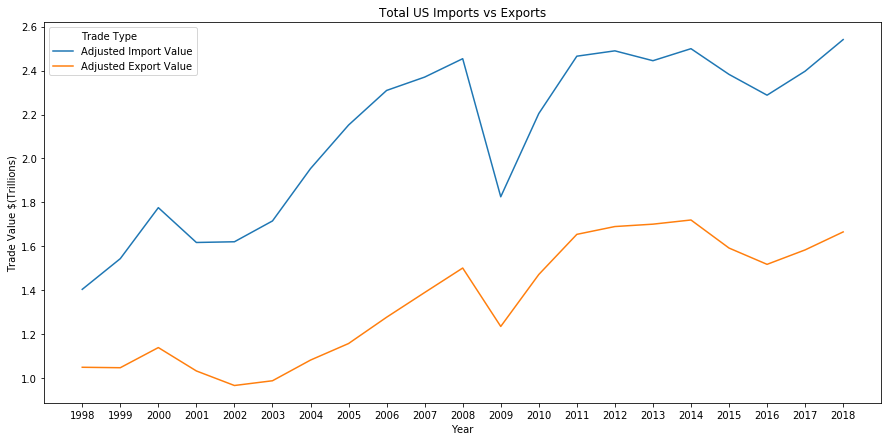

In [41]:
plt.figure(figsize=(15,7))
sns.lineplot( x = 'Year', y = 'Trade Value', hue= 'Trade Type', data = total_trade_long);
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(np.arange(total_trade_long.Year.min(), total_trade_long.Year.max() + 1, 1))
plt.ylabel('Trade Value $(Trillions)')
plt.title('Total US Imports vs Exports');


 ##### The dip in trade that was observed during the recession is evident
 ##### The recession started in December of 2007 and lasted till June of 2009, so it's interesting to note that trade did not dip immediately in 2008, but instead went up in 2008 and dropped sharply in 2009

In [42]:
exports_data.head()

,Commodity,Country,Export Value,Year,CPI,Decade,Adjusted Export Value
0,Live Animals,Algeria,52789.0,2010,218.056,2010s,60790.29
1,Live Animals,Congo (Brazzaville),6857.0,2010,218.056,2010s,7896.32
2,Live Animals,Egypt,3995663.0,2010,218.056,2010s,4601290.26
3,Live Animals,Gabon,65000.0,2010,218.056,2010s,74852.13
4,Live Animals,Ghana,1266199.0,2010,218.056,2010s,1458118.25


In [43]:
# Summing up trade values by decade and commodity
exports_commodity_decade = exports_data.groupby(['Commodity','Decade'], as_index=False).agg({'Adjusted Export Value':[sum]})
exports_commodity_decade.columns = exports_commodity_decade.columns.get_level_values(0)
imports_commodity_decade = imports_data.groupby(['Commodity','Decade'], as_index=False).agg({'Adjusted Import Value':[sum]})
imports_commodity_decade.columns = imports_commodity_decade.columns.get_level_values(0)
imports_commodity_decade.head()


,Commodity,Decade,Adjusted Import Value
0,"Aircraft, Spacecraft, And Parts Thereof",1990s,4.318227e+10
1,"Aircraft, Spacecraft, And Parts Thereof",2000s,2.419999e+11
2,"Aircraft, Spacecraft, And Parts Thereof",2010s,2.732026e+11
3,Albuminoidal Subst; Modified Starch; Glue; Enz...,1990s,3.321868e+09
4,Albuminoidal Subst; Modified Starch; Glue; Enz...,2000s,1.979932e+10


In [44]:
# Ranking the commodities of each decade by the dollar value imported or exported
exports_commodity_decade['Rank'] = exports_commodity_decade.groupby('Decade')['Adjusted Export Value'].rank(ascending = False)
exports_commodity_decade = exports_commodity_decade.sort_values(by = ['Decade', 'Rank'])
imports_commodity_decade['Rank'] = imports_commodity_decade.groupby('Decade')['Adjusted Import Value'].rank(ascending = False)
imports_commodity_decade = imports_commodity_decade.sort_values(by = ['Decade', 'Rank'])
imports_commodity_decade.head()

,Commodity,Decade,Adjusted Import Value,Rank
171,"Nuclear Reactors, Boilers, Machinery Etc.; Parts",1990s,4.869128e+11,1.0
72,Electric Machinery Etc; Sound Equip; Tv Equip;...,1990s,4.156515e+11,2.0
273,"Vehicles, Except Railway Or Tramway, And Parts...",1990s,4.110915e+11,3.0
147,"Mineral Fuel, Oil Etc.; Bitumin Subst; Mineral...",1990s,2.029153e+11,4.0
177,"Optic, Photo Etc, Medic Or Surgical Instrments...",1990s,8.987164e+10,5.0


In [45]:
# Narrowing to just the top ten commodities
exports_commodity_decade = exports_commodity_decade.loc[exports_commodity_decade['Rank'] <= 10]
imports_commodity_decade = imports_commodity_decade.loc[imports_commodity_decade['Rank'] <= 10]

#Converting the units to billions
exports_commodity_decade['Adjusted Export Value'] = exports_commodity_decade['Adjusted Export Value']/1000000000
imports_commodity_decade['Adjusted Import Value'] = imports_commodity_decade['Adjusted Import Value']/1000000000

#### Plot 2 : Top 10 Commodities Imported by Decade

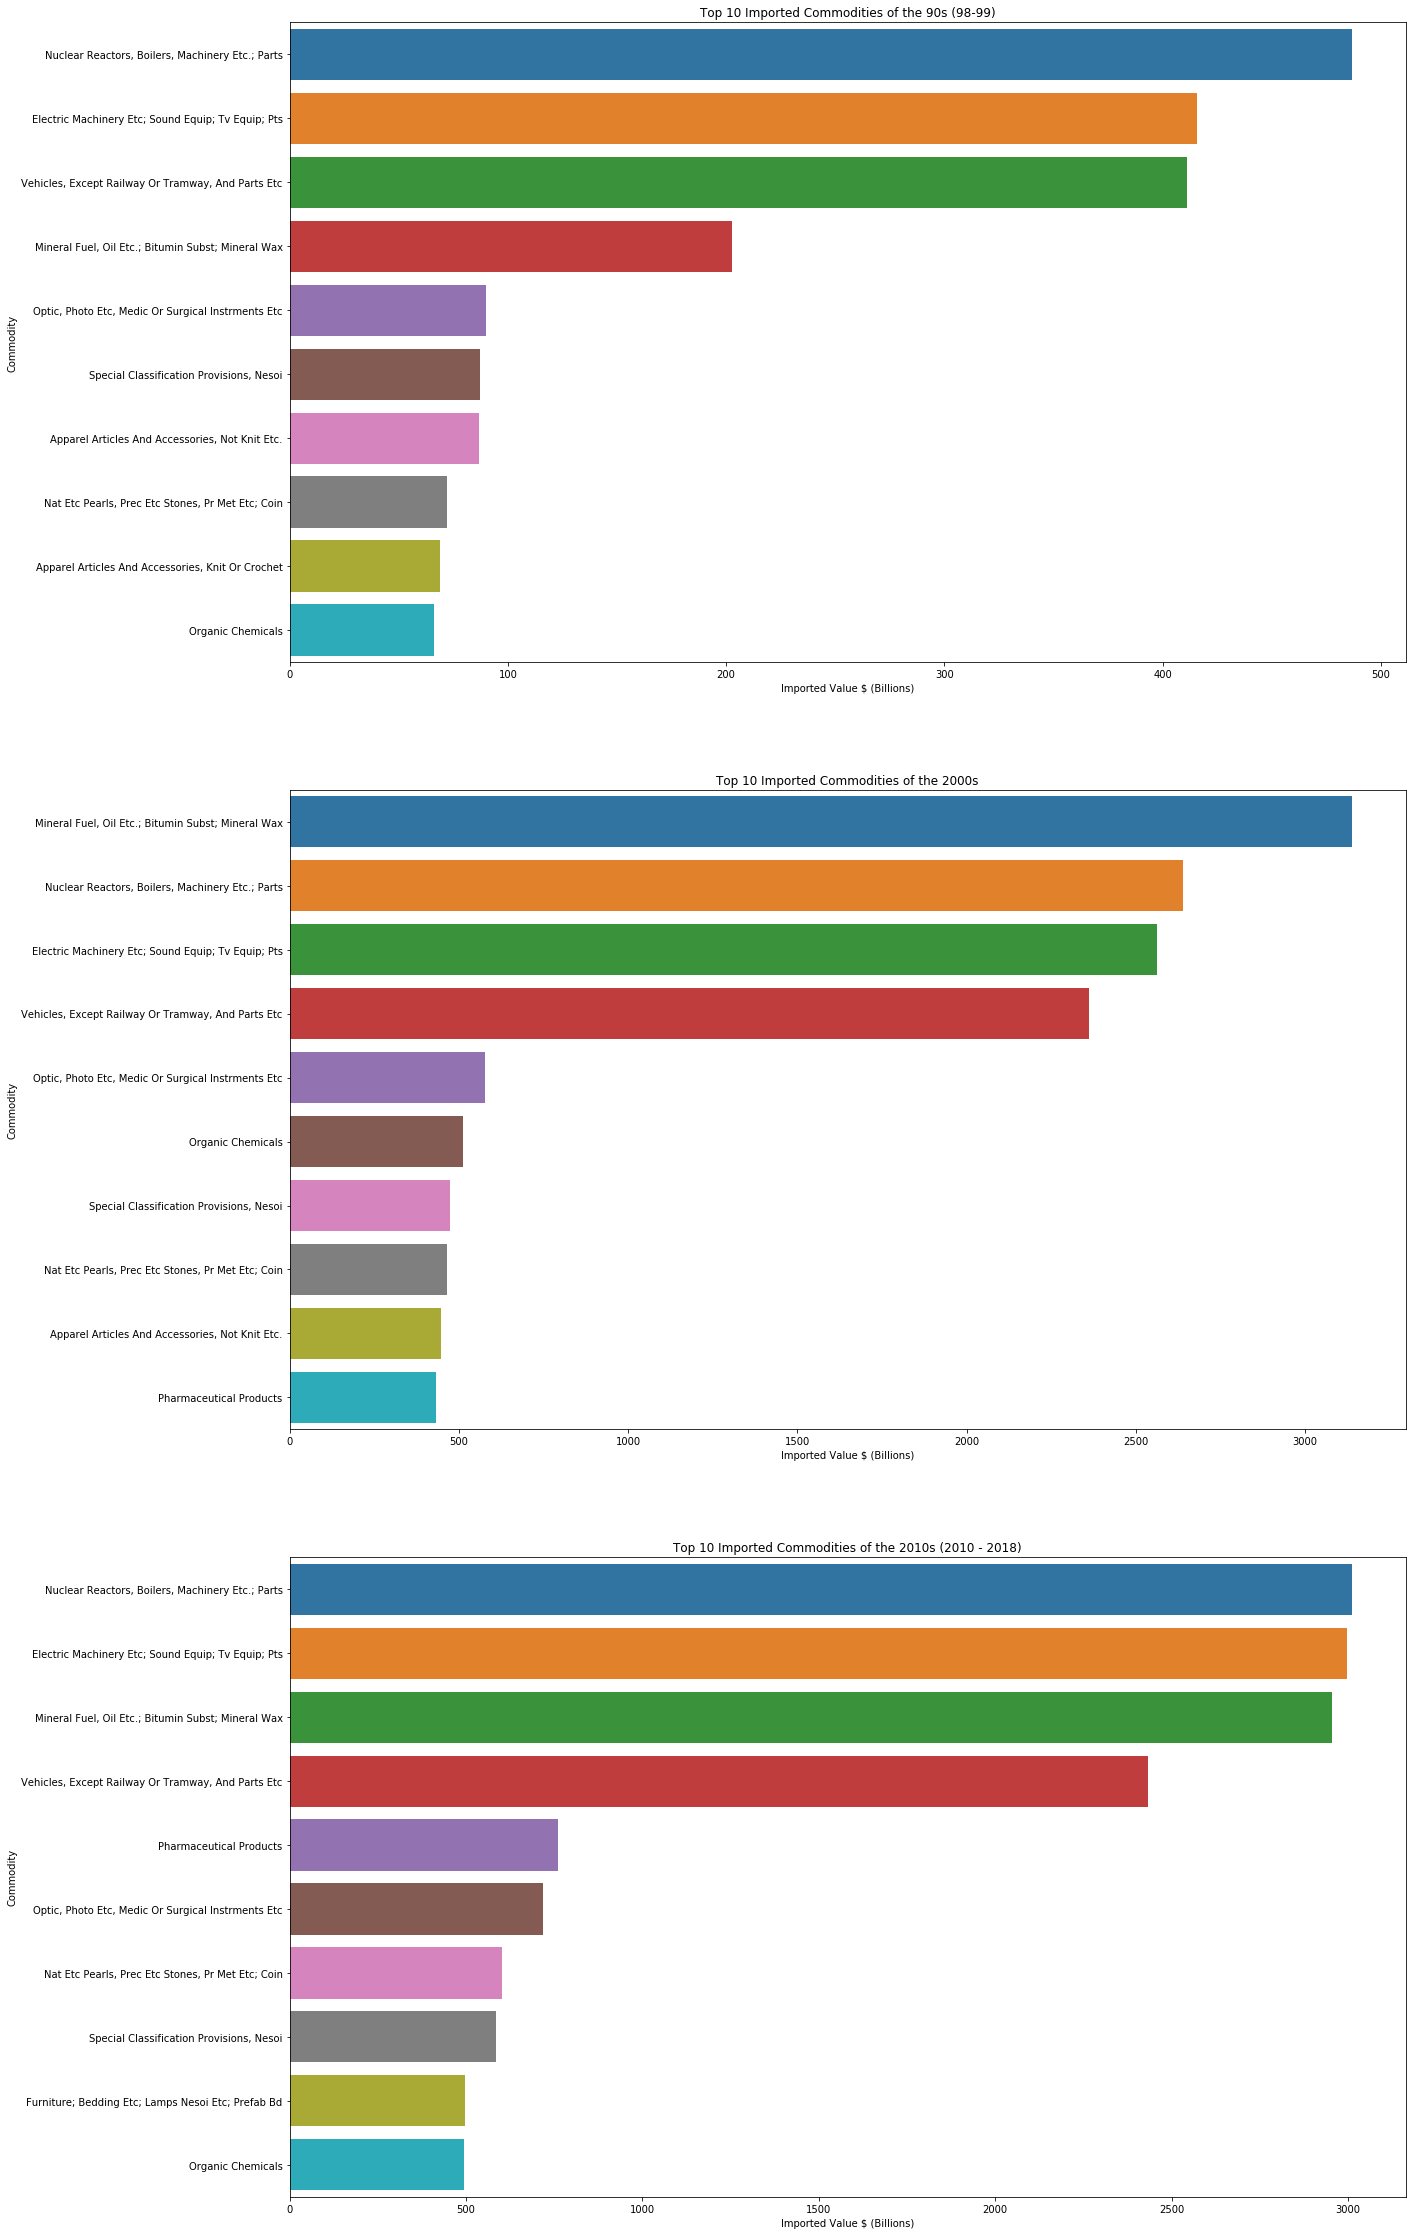

In [59]:
fig, ax = plt.subplots(3, figsize = (20, 40))
chart2 = sns.barplot( y = 'Commodity' , x = 'Adjusted Import Value', data = imports_commodity_decade.loc[imports_commodity_decade['Decade']=='1990s'], ax = ax[0]);
chart2.set_title('Top 10 Imported Commodities of the 90s (98-99)')
chart2.set_xlabel('Imported Value $ (Billions)');

chart3 = sns.barplot( y = 'Commodity' , x= 'Adjusted Import Value', data = imports_commodity_decade.loc[imports_commodity_decade['Decade']=='2000s'], ax = ax[1]);
chart3.set_title('Top 10 Imported Commodities of the 2000s')
chart3.set_xlabel('Imported Value $ (Billions)');

chart6 = sns.barplot( y = 'Commodity' , x= 'Adjusted Import Value', data = imports_commodity_decade.loc[imports_commodity_decade['Decade']=='2010s'], ax = ax[2]);
chart6.set_title('Top 10 Imported Commodities of the 2010s (2010 - 2018)')
chart6.set_xlabel('Imported Value $ (Billions)');

#### Plot 3 : Top 10 Commodities Exported by Decade

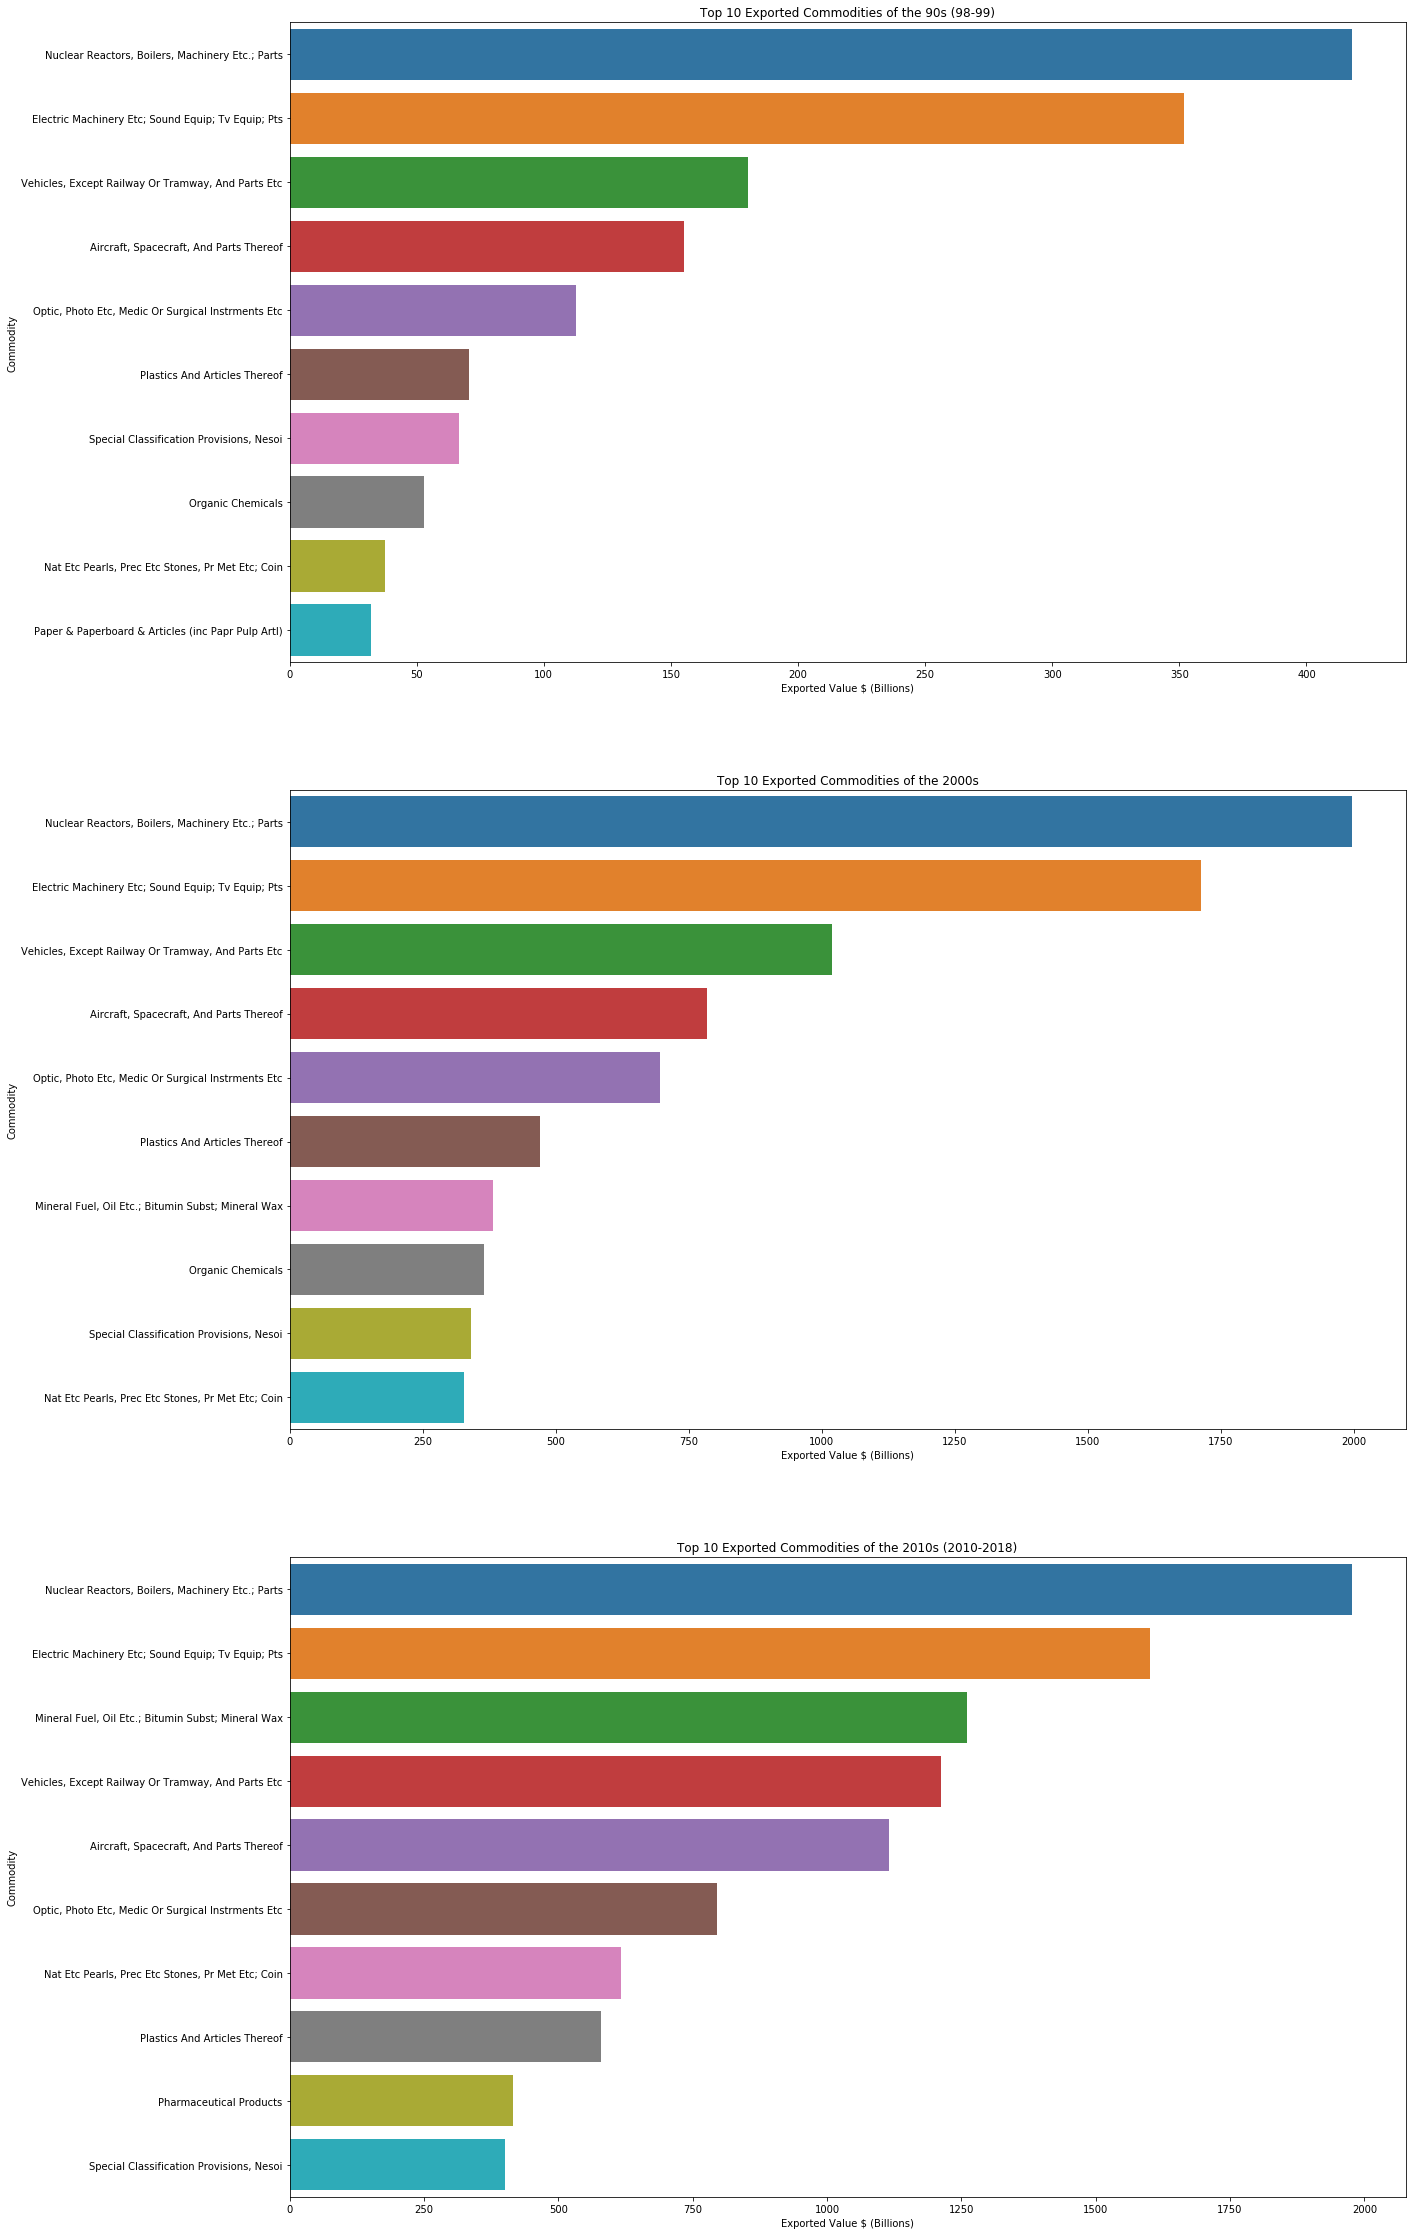

In [71]:
fig, ax = plt.subplots(3, figsize = (20, 40))


chart4 = sns.barplot( y = 'Commodity' , x = 'Adjusted Export Value', data = exports_commodity_decade.loc[exports_commodity_decade['Decade']=='1990s'], ax = ax[0]);
chart4.set_title('Top 10 Exported Commodities of the 90s (98-99)')
chart4.set_xlabel('Exported Value $ (Billions)');


chart5 = sns.barplot( y = 'Commodity' , x= 'Adjusted Export Value', data = exports_commodity_decade.loc[exports_commodity_decade['Decade']=='2000s'], ax = ax[1]);
chart5.set_title('Top 10 Exported Commodities of the 2000s')
chart5.set_xlabel('Exported Value $ (Billions)');

chart7 = sns.barplot( y = 'Commodity' , x= 'Adjusted Export Value', data = exports_commodity_decade.loc[exports_commodity_decade['Decade']=='2010s'], ax = ax[2]);
chart7.set_title('Top 10 Exported Commodities of the 2010s (2010-2018)')
chart7.set_xlabel('Exported Value $ (Billions)');


#### Insights :-
##### 1. Mineral Fuel and Oil exports have seen a substantial rise (add number)